In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization,Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from os.path import isfile, join
from dataset_loader import DatasetLoader
from constants import *

In [2]:
class EmotionRecognition:
    def __init__(self):
        self.dataset = DatasetLoader()

    def build_network(self):
        self.model = Sequential()
        self.model.add(Input((48,48,1)))
        self.model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        self.model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.2))

        self.model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.22))

        self.model.add(Flatten())
        self.model.add(Dense(512, activation='relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(7, activation='softmax'))

        self.model.compile(loss='categorical_crossentropy',
                      optimizer='adam' ,
                      metrics=['acc'])

    def load_saved_dataset(self):
        self.dataset.load_from_save()
        print('[+] Dataset found and loaded')

    def start_training(self):
        self.load_saved_dataset()
        self.build_network()
        if self.dataset is None:
            self.load_saved_dataset()
        # Training
        print('[+] Training network')
        history = self.model.fit(
            self.dataset.images, self.dataset.labels,
            validation_data=(self.dataset.images_test,
                            self.dataset.labels_test),
            epochs =100,
            batch_size=50,
            shuffle=True,
            verbose = 2
        )
        return history

    def predict(self, image):
        if image is None:
            return None
        image = image.reshape([-1, SIZE_FACE, SIZE_FACE, 1])
        return self.model.predict(image)

    def save_model(self):
        self.model.save(join(SAVE_DIRECTORY, SAVE_MODEL_FILENAME))
        print('[+] Model trained and saved at ' + SAVE_MODEL_FILENAME)

    def load_model(self):
        if isfile(join(SAVE_DIRECTORY, SAVE_MODEL_FILENAME)):
            self.model.load(join(SAVE_DIRECTORY, SAVE_MODEL_FILENAME))
            print('[+] Model loaded from ' + SAVE_MODEL_FILENAME)


In [3]:
my_network = EmotionRecognition()
my_network.build_network()
print(my_network.model.summary())

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441,223 (5.50 MB)

 Trainable params: 1,441,223 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
history = my_network.start_training()

[+] Dataset found and loaded
[+] Training network
Epoch 1/100
310/310 - 64s - 205ms/step - acc: 0.2652 - loss: 1.8165 - val_acc: 0.2641 - val_loss: 1.8141
Epoch 2/100
310/310 - 60s - 193ms/step - acc: 0.3437 - loss: 1.6740 - val_acc: 0.4376 - val_loss: 1.5165
Epoch 3/100
310/310 - 60s - 192ms/step - acc: 0.4380 - loss: 1.4837 - val_acc: 0.4759 - val_loss: 1.4004
Epoch 4/100
310/310 - 57s - 185ms/step - acc: 0.4783 - loss: 1.3815 - val_acc: 0.5200 - val_loss: 1.2684
Epoch 5/100
310/310 - 59s - 190ms/step - acc: 0.5127 - loss: 1.2971 - val_acc: 0.5479 - val_loss: 1.2104
Epoch 6/100
310/310 - 58s - 189ms/step - acc: 0.5314 - loss: 1.2499 - val_acc: 0.5711 - val_loss: 1.1631
Epoch 7/100
310/310 - 58s - 186ms/step - acc: 0.5460 - loss: 1.2083 - val_acc: 0.5548 - val_loss: 1.1585
Epoch 8/100
310/310 - 59s - 191ms/step - acc: 0.5631 - loss: 1.1686 - val_acc: 0.5659 - val_loss: 1.1401
Epoch 9/100
310/310 - 60s - 193ms/step - acc: 0.5710 - loss: 1.1470 - val_acc: 0.5641 - val_loss: 1.1204
Epoch

Epoch 78/100
310/310 - 57s - 183ms/step - acc: 0.8178 - loss: 0.5024 - val_acc: 0.6367 - val_loss: 1.1229
Epoch 79/100
310/310 - 57s - 184ms/step - acc: 0.8205 - loss: 0.4937 - val_acc: 0.6315 - val_loss: 1.1407
Epoch 80/100
310/310 - 77s - 248ms/step - acc: 0.8255 - loss: 0.4835 - val_acc: 0.6384 - val_loss: 1.1596
Epoch 81/100
310/310 - 60s - 193ms/step - acc: 0.8281 - loss: 0.4833 - val_acc: 0.6367 - val_loss: 1.1710
Epoch 82/100
310/310 - 59s - 189ms/step - acc: 0.8278 - loss: 0.4830 - val_acc: 0.6355 - val_loss: 1.1430
Epoch 83/100
310/310 - 59s - 190ms/step - acc: 0.8297 - loss: 0.4801 - val_acc: 0.6378 - val_loss: 1.2516
Epoch 84/100
310/310 - 59s - 190ms/step - acc: 0.8244 - loss: 0.4927 - val_acc: 0.6332 - val_loss: 1.1583
Epoch 85/100
310/310 - 57s - 183ms/step - acc: 0.8346 - loss: 0.4795 - val_acc: 0.6274 - val_loss: 1.1779
Epoch 86/100
310/310 - 57s - 184ms/step - acc: 0.8320 - loss: 0.4735 - val_acc: 0.6286 - val_loss: 1.2022
Epoch 87/100
310/310 - 61s - 198ms/step - acc:

In [5]:
my_network.save_model()

[+] Model trained and saved at model_100_epochs_20000_faces.h5


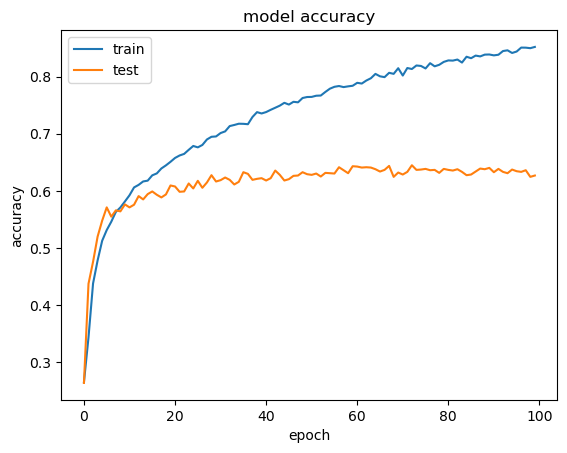

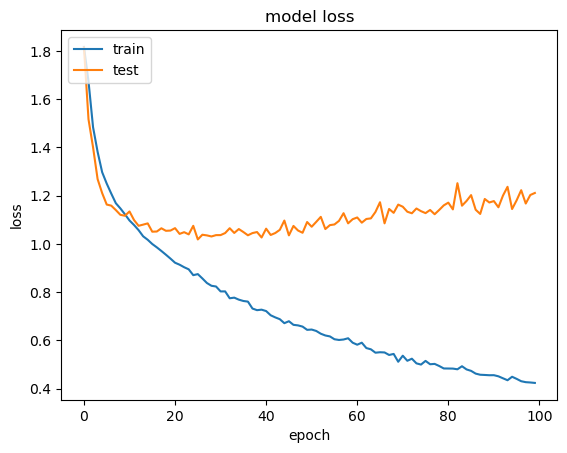

In [6]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()